<a href="https://colab.research.google.com/github/farmahin/Toxicogenomics/blob/main/Nick_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install Scispacy

In [1]:



!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_sm-0.5.4.tar.gz



  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_sm-0.5.4.tar.gz (14.8 MB)
  Preparing metadata (setup.py) ... done


import spacy and scispacy

In [8]:
import spacy
nlp = spacy.load("en_core_sci_sm")
print("SciSpacy model loaded successfully!")


SciSpacy model loaded successfully!


install en_core_sci_lg

In [10]:

!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_lg-0.5.4.tar.gz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.2/531.2 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_sci_lg: filename=en_core_sci_lg-0.5.4-py3-none-any.whl size=531476535 sha256=f8acddc2f8b25157c091af099102a826921b85d623af7da4e37d4275e6462622
  Stored in directory: /root/.cache/pip/wheels/d6/b1/2f/ce1b43e2194a41a5c93baa170fd8cb638e4938a068a7190068
Successfully built en_core_sci_lg


In [ ]:
imprt en_core_sci_lg

In [11]:
nlp=spacy.load('en_core_sci_lg', enable='tok2vec,tagger,parser,ner')

In [12]:
texts = [
    'thyroid gland carcinoma',
    'anaplastic thyroid carcinoma',
    'intrathyroid thymic carcinoma',
    'thyroid lymphoma',
    'thyroid angiosarcoma',
    'trabecular follicular adenocarcinoma',
    'megaloblastic anemia',
    'immunoglobulin light chain amyloidosis',
]

In [13]:
category_names = ['thyroid cancer', 'other']
category_ids = [0, 0, 0, 0, 0, 0, 1, 1]

In [14]:
docs = [nlp(x) for x in texts]

In [15]:
for i, doc in enumerate(docs):
    for token in doc:
        if token.is_oov:
            print(f'Warning: token "{token.text}" is out-of-vocabulary in doc "{doc.text}" ({i = })' )

In [16]:
print(docs[0].vector.shape)
print(docs[0].vector)

(200,)
[-0.01941223  0.138516   -0.28267536  0.16912615  0.14885364 -0.21331067
 -0.22044508 -0.20384401 -0.22346914 -0.18487239 -0.11943569 -0.13721932
  0.61567867  0.0662838   0.18723953  0.02386199 -0.0731397  -0.22965433
  0.43099666  0.07884759  0.22455865 -0.14311028 -0.00756643 -0.06904104
  0.07646061  0.053272   -0.12920363  0.0925227   0.00434283  0.13677518
  0.35914397 -0.332394   -0.18375234 -0.12188029  0.12556487 -0.18378757
  0.1537929  -0.4988207   0.08516707 -0.3768097   0.16976066  0.05973201
  0.298522    0.31469098 -0.09918507 -0.00488983  0.01048917  0.1457182
  0.02894733 -0.38901067  0.16981177 -0.32833865  0.22530217 -0.21538101
 -0.15239133 -0.16636343  0.392246    0.3696687   0.04749037 -0.1379231
 -0.0146141   0.027522    0.20651858 -0.04581913  0.02851167  0.05857601
  0.37958685 -0.07014596  0.164248    0.08664934 -0.04753703  0.187971
  0.21632867 -0.0301068  -0.0537446   0.06947833  0.3912413  -0.11783633
 -0.352177   -0.21975367  0.14878534  0.30675504

In [17]:
tokens = [x for x in docs[0]]
print(tokens[0].vector.shape)
print(tokens[0].vector)

(200,)
[-0.120679    0.101227   -0.154269    0.207333    0.255804   -0.437519
 -0.146203    0.15269    -0.21208    -0.296747   -0.00393368  0.120805
  0.560068    0.0120329   0.0828836  -0.252766   -0.154107   -0.128119
  0.369909    0.0989348   0.371489   -0.0527753   0.0551537  -0.110216
  0.164182   -0.026667   -0.0808728   0.173836   -0.0103437   0.285346
  0.29468    -0.320574   -0.111799   -0.24163     0.0590896  -0.0132887
  0.0156487  -0.614434   -0.00449188 -0.645052    0.0191938   0.120409
  0.35142     0.156002   -0.00179019 -0.135674    0.0906297   0.275609
  0.168337   -0.33929     0.356954   -0.348864    0.383397   -0.173649
 -0.171999   -0.177264    0.204768    0.400987    0.0681881   0.052124
 -0.114883    0.072686    0.341751   -0.0630684  -0.0785259   0.00879082
  0.364028    0.216541    0.293224   -0.204382   -0.0580955   0.216388
  0.160104   -0.0815984  -0.0401977  -0.102469    0.166009   -0.235253
 -0.414394   -0.018866    0.144616    0.218571   -0.0439236  -0.014

In [19]:
import itertools
similarity = [docs[i].similarity(docs[j]) for i, j in itertools.combinations(range(len(docs)), 2)]

In [21]:
import numpy as np
from scipy.spatial.distance import squareform
import pandas as pd

v = np.array(similarity)    # Long form vector.
m = squareform(v)   # Square form matrix, but with diagonals = 0.
m = m + np.eye(m.shape[0])  # Add same-sized identity matrix, so diagonals = 1.
similarity_df = pd.DataFrame(data=m, columns=texts, index=texts) # Create a dataframe, setting the column and row/index names from the text list.
similarity_df  # Show the dataframe.

,thyroid gland carcinoma,anaplastic thyroid carcinoma,intrathyroid thymic carcinoma,thyroid lymphoma,thyroid angiosarcoma,trabecular follicular adenocarcinoma,megaloblastic anemia,immunoglobulin light chain amyloidosis
thyroid gland carcinoma,1.000000,0.850390,0.844050,0.738343,0.795812,0.650336,0.066670,0.146219
anaplastic thyroid carcinoma,0.850390,1.000000,0.834263,0.807546,0.812664,0.642527,0.081435,0.158007
intrathyroid thymic carcinoma,0.844050,0.834263,1.000000,0.725719,0.744757,0.732826,0.145635,0.167901
thyroid lymphoma,0.738343,0.807546,0.725719,1.000000,0.794629,0.585262,0.192387,0.255040
thyroid angiosarcoma,0.795812,0.812664,0.744757,0.794629,1.000000,0.550168,0.146193,0.173241
trabecular follicular adenocarcinoma,0.650336,0.642527,0.732826,0.585262,0.550168,1.000000,0.161830,0.102692
megaloblastic anemia,0.066670,0.081435,0.145635,0.192387,0.146193,0.161830,1.000000,0.121093
immunoglobulin light chain amyloidosis,0.146219,0.158007,0.167901,0.255040,0.173241,0.102692,0.121093,1.000000


[Text(0.5, 1.0, 'Document vector similarity')]

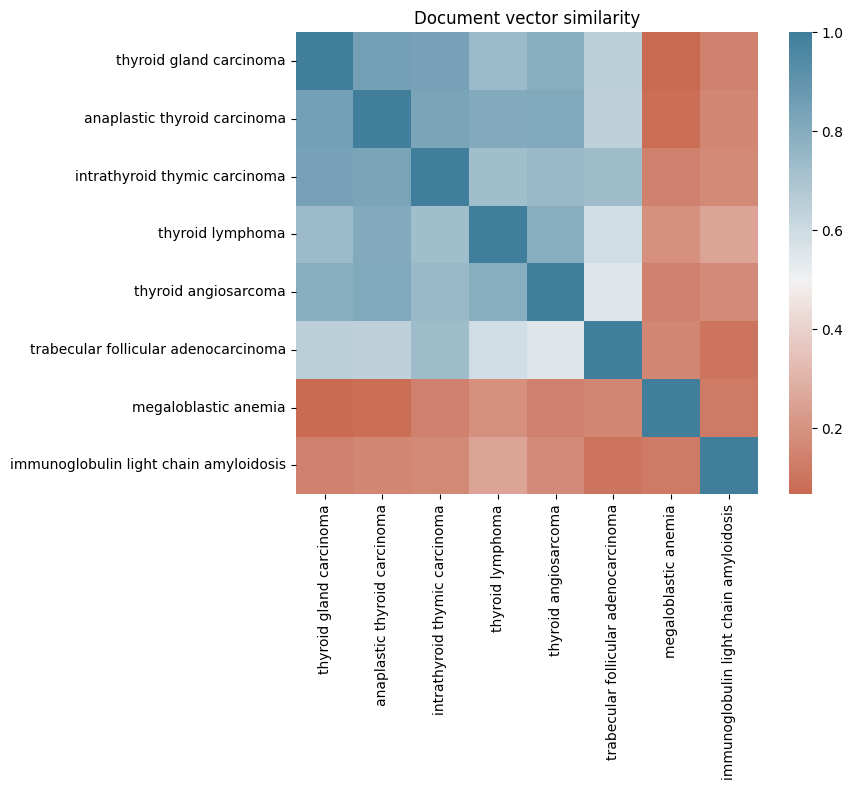

In [23]:
import matplotlib.pyplot as plt
import seaborn as sb

fig, ax = plt.subplots(figsize=(8, 6)) # Create figure and axis with given figure size.
cmap = sb.diverging_palette(20, 230, as_cmap=True)  # Create a colour map for the similarity data.
sb.heatmap(data=similarity_df, square=True, cmap=cmap, center=0.5, ax=ax) # Generate the heatmap.
ax.set(title='Document vector similarity')

In [26]:
from sklearn.decomposition import PCA

features = pd.DataFrame(data=[x.vector for x in docs], index=texts)
X_reduced = PCA(n_components=3).fit_transform(X=features)

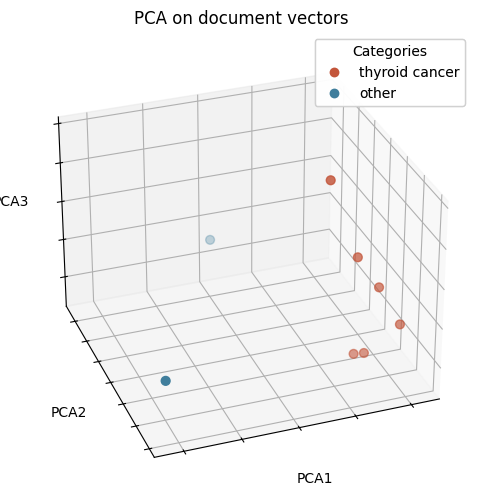

In [27]:
# Create figure and axis.
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)
# Add 1st 3 PCAs to scatter plot, coloured by category id.
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=category_ids,
    s=40,
    cmap=cmap,
)
# Set labels.
ax.set(title='PCA on document vectors', xlabel='PCA1', ylabel='PCA2', zlabel='PCA3')
# Hide numeric tick labels by setting them to empty lists (optional).
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
# Add legend, using category_names.
legend1 = ax.legend(
    scatter.legend_elements()[0],
    category_names,
    loc='upper right',
    title='Categories',
)
ax.add_artist(legend1)